In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from collections import OrderedDict
import h5py
import importlib
DataDir = '/nfs/Data/Proteasome Project Data'
import sys
sys.path.append(DataDir)
import MPLGUI as MP
import MPLGUI as MP
import matplotlib._pylab_helpers
def ClearAllFigs():
    figures=[manager.canvas.figure for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    print figures
    for figure in figures:
        MP.mpl.close(figure)
# %matplotlib inline

In [4]:
# %run "DataView Current-Dataset Check.py"

In [5]:
1e13/3600/24/365/1000

317.09791983764586

In [6]:
RD = np.load('/nfs/Data/MPLGUI/FigureData/RankData.npy')
RD_SD_Rates = np.load('/nfs/Data/MPLGUI/FigureData/RankData - SynDegRatePoints.npy')
RD_DSG_Rates = np.load('/nfs/Data/MPLGUI/FigureData/RankData-DataSetGrowthRatePoints.npy')
RD_DS = np.load('/nfs/Data/MPLGUI/FigureData/RankData-DataSets.npy')

In [7]:
import os, fnmatch
DataSets = []
listOfFiles = os.listdir(DataDir)  
pattern = "STV3*.py"
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        DataSets.append(entry[:-3])
print (DataSets)


['STV3SynDeg17e-05T', 'STV3SynDeg28e-04T', 'STV3SynDeg10e-09T', 'STV3StaticT', 'STV3SynDeg32e-08T', 'STV3SynDeg10e-16T', 'STV3SynDeg10e-11T', 'STV3SynDeg11e-06T', 'STV3SynDeg27e-07T', 'STV3SynDeg43e-06T', 'STV3SynDeg35e-05T', 'STV3SynDeg10e-10T', 'STV3SynDeg22e-06T', 'STV3SynDeg87e-06T', 'STV3SynDeg10e-14T', 'STV3SynDeg10e-13T', 'STV3SynDeg10e-12T', 'STV3SynDeg54e-07T', 'STV3SynDeg10e-15T', 'STV3SynDeg69e-05T', 'STV3SynDeg56e-04T', 'STV3SynDeg14e-04T']


In [8]:
len(DataSets)

22

In [7]:
ShowPlots = True
LineWidth = 2.0
Settings = {"hpad": 0.3, "wpad": 0.3, "FontSize": 11, "ShowNormLine":False}

import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

In [8]:
def find_nearest(a, a0, return_idx = False):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    if return_idx:
        return idx
    return a.flat[idx]

In [9]:
# Setup Initial Values
A0 = 4.0e-6
# A0 = 1.0e-8
# Time = 1.0e8
Time = 3600*24 # One Day
# Time = 10**10

# TimeTarget = np.argmax(TimePoints==find_nearest(TimePoints, Time))
# TT = TimeTarget
# A0Target = np.argmax(A0Range==find_nearest(A0Range, A0))
# A0 = A0Range[A0Target]
# Time = TimePoints[TimeTarget]
# print Time
# print A0

# Species = 11

# # A0 = 1.0e-8
# # Time = 1.0e8
# Time = 3600*24 # One Day

# TT = np.argmax(TimePoints > 1.00000000e+12)
# TT = len(TimePoints)-1
# print ("{} : {:.2e}".format(TT, TimePoints[TT]))

In [10]:
N = 1
def ChangeDS(NewWorkingName):
    global N
    global WorkingName
    global FullOutArray
    global Errors
    global HasData
    global Runtimes
    global A0Range
    global KD1Range
    global KD2Range
    global Kp
    global TimePoints
    global SpeciesCount
    global Delta
    global Deg
    global Time
    global A0
    global TimeTarget
    global TT
    global A0Target
    
    WorkingName = NewWorkingName
    
    try:
        del FullOutArray
    except:
        pass

    File = h5py.File("{}/{}{}.h5".format(DataDir, N, WorkingName), "r")
    if N == 1:
        CD = importlib.import_module("{}{}".format("",WorkingName))
    else:
        CD = importlib.import_module("{}{}".format(N-1,WorkingName))

    FullOutArray = File["Results"][:]
    FullOutArray = FullOutArray[::-1,::-1,:,:,:]


    Errors = File["Errors"][:]
    HasData = File["HasData"][:]
    Runtimes = File["Runtimes"][:]
    A0Range = File["A0Range"][:]
    Delta = CD.Delta
    Deg = Delta

    KD1Range = File["KD1Range"][:]
    KD1Range = KD1Range[::-1]

    KD2Range = File["KD2Range"][:]
    KD2Range = KD2Range[::-1]

    Kp = File["Kp"][()]
    TimePoints = CD.KeepTimePoints
    SpeciesCount = CD.SpeciesCount
    
    TimeTarget = find_nearest(TimePoints, Time, return_idx=True)
    TT = TimeTarget
    A0Target = find_nearest(A0Range, A0, return_idx=True)
    A0 = A0Range[A0Target]
    Time = TimePoints[TimeTarget]

    print "Working Name: {}".format(WorkingName)
    print "Shape: {}".format(Errors.shape)
    print "Errors: {}".format(np.sum(Errors==True))
    print "HasData: {}".format(np.sum(HasData==True))
    print "Time at TimePoint: {}".format(Time)
    print "Conc at A0Point: {}".format(A0)

In [11]:
from scipy.stats import rankdata

In [12]:
%%time 
# Figure Settings
Species=11
ImgFileName = "Static_FracPlot_Species_{}.pdf".format(Species)
Title       = "Static : Species {}".format(Species)
XAxisLabel  = 'Time (s)'

ChangeDS("STV3StaticT")
CDataSet = "in vitro-like"
# Static = FullOutArray[:,:,1,:,Species]
# YAxisLabel  = 'Assembly Efficiency Rank'
# YAxisLabel  = 'Species Yield'
# MainPlot.YLabel("Yield of Maximal Structure")
# XAxisPoints = TimePoints
# XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

# StaticFlat = np.array([Static[:,:,i].reshape(10000) for i in range(len(TimePoints))])

ColorList = {
    "SW":"#e41a1c",
    "WW":"#377eb8",
    "SS":"#4daf4a",
    "WS":"#984ea3",
    "M":"#ff7f00",
}
DataIndicies = {
    "SW":9900,
    "WW":9999,
    "SS":0,
    "WS":99,
    "M":5555,
}
DataLocations = {
    "SW":(np.min(KD1Range), np.max(KD2Range)),
    "WW":(np.max(KD1Range), np.max(KD2Range)),
    "SS":(np.min(KD1Range), np.min(KD2Range)),
    "WS":(np.max(KD1Range), np.min(KD2Range)),
    "M":(KD1Range[55], KD2Range[55]),
}
DataIndices = {
    "SW":(-1, 0),
    "WW":(-1, -1),
    "SS":(0, 0),
    "WS":(0, -1),
    "M":(55, 55),
}

DataNames = {x:map("{:.0e}".format,y) for (x,y) in DataLocations.items()}

Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
CPU times: user 87.9 ms, sys: 225 ms, total: 313 ms
Wall time: 327 ms


In [13]:
A0Range

array([  2.00000000e-06,   4.00000000e-06])

def AddContour(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect=1.0,
                hpad=0.3,
                wpad=0.3,
                axes_aspect="equal",
                ShiftRight = 0.0,
                ColorMarkers = True,
                *args,
                **kwargs
            ):

In [14]:
# from MPLGUI import ContourPlot
import MPLGUI as MP

__author__ = 'Koan'

def AddContour(
                MainPlot,
                PlotIndex,
                DataSet,
                Width = MP.inches2mm(3.25),
                FontSize = 5.5,
                Aspect=1.0,
                hpad=0.3,
                wpad=0.3,
                axes_aspect="equal",
                ShiftRight = 0.0,
                ColorMarkers = False,
                *args,
                **kwargs
            ):
    import numpy as np
    import MPLGUI as MP
    from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    Images = MP.ImportImages()
    
    global A0Target
    global TimeTarget
    
    IP = False
    InVivo = False
    ContourData = FullOutArray[:,:,A0Target,TimeTarget,11].T

#     KD1Range = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))
#     KD2Range = np.load("{}/{}".format(MP.DefaultDataDir, "KDRange.npy"))

    XLim = [np.max(KD1Range),np.min(KD1Range)]
    YLim = [np.max(KD2Range),np.min(KD2Range)]

    XBounds = (XLim[0] <= KD1Range) & (KD1Range<= XLim[1])
    XBounds = (YLim[0] <= KD2Range) & (KD2Range<= YLim[1])

    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot

    MainPlot = MP.ContourPlot(
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        axes_aspect=axes_aspect,
    )
    """
    gs = gridspec.GridSpec(3,2)
    global T1
    T1 = gs
    global T2
    ll,bb,ww,hh = gs.get_position().bounds
    CB.ax.set_position([ll, bb, ww, hh])
#     MainPlot._Plot.set_position(gs[0:2].get_position(MainPlot._MainFig))
#     MainPlot._Plot.set_subplotspec(gs[0:2]) 
    """

    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    YTicks = MainPlot._Plot.yaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
        YTicks[Index].label1On = ""

    import matplotlib.cm as cm
    
#     ColorMap = cm.gray_r
#     ColorMap = cm.gray
    ColorMap = cm.binary
#     ColorMap = cm.plasma_r
    
    ContourImage = MainPlot._Plot.pcolormesh(
        KD1Range,
        KD2Range,
        ContourData,
        cmap=ColorMap,
        shading="gouraud"
        # vmin=0.0,
        # vmax=1.0,
    )
    ContourImage.autoscale()
    ZLim = [np.min(ContourData), np.max(ContourData)]
#         ZLim = [0.0,1.0]
    Delta = ZLim[1] - ZLim[0]
    ContourLevels = [
            ZLim[0]+1.0*Delta/5.0,
            ZLim[0]+2.0*Delta/5.0,
            ZLim[0]+3.0*Delta/5.0,
            ZLim[0]+4.0*Delta/5.0,
    ]
    if DataSet == "in vivo-like":
        ContourLevels = [
                ZLim[0]+1.0*Delta/5.0,
                ZLim[0]+2.0*Delta/5.0,
                ZLim[0]+3.0*Delta/5.0,
                ZLim[0]+4.0*Delta/5.0,
                0.97,
                0.975,
                0.98
                ]

#         if DataSet == "In Vivo":
#             ContourLevels = [
#                     ZLim[0]+1.0*Delta/5.0,
#                     ZLim[0]+2.0*Delta/5.0,
#                     ZLim[0]+3.0*Delta/5.0,
#                     ZLim[0]+4.0*Delta/5.0,
#                     ]
# #             ContourLevels = [
# #                     0.40,
# #                     0.60,
# #                     0.63,
# #                     0.65,
# #                     ]
#         elif DataSet == "In Vitro":
#             ContourLevels = [
#                     0.50,
#                     0.59,
#                     0.75,
#                     0.99,
#                     ]
    print ZLim
    print ContourLevels
    CLs = MainPlot._Plot.contour(
        KD1Range,
        KD2Range,
        ContourData,
        ContourLevels,
        origin='lower',
        linewidths=2.0,
        colors=(
            'red',
            'blue',
            'green',
            'purple',
        )
    )
    if ContourLevels[-1] > 0.95:
        ContourLevels = ContourLevels[:-1]
    Colorbar = MP.mpl.colorbar(
            ContourImage,
            #     ticklocation = [],
            ticks = [ZLim[0],ZLim[1]]+ContourLevels,
            format = '%1.3f',
#                 format = '%3d%%',
            drawedges = False,
            orientation = 'vertical',
            #     shrink=0.8,
            #     extend='neither'
#                 shrink=0.8
        )

    MainPlot._Plot.tick_params(
            which = 'major',
            labelsize=FontSize*0.8,
            pad = 1.5, # How far are the labels from the mark
    )
    Colorbar.ax.tick_params(which='both',length=0, labelsize=FontSize*0.8)
    # Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
    Colorbar.add_lines(CLs)
    # Colorbar.set_ticks(ContourLevels)
    Colorbar.update_ticks()

#         MainPlot._Plot.clabel(
#             ContourLines,
#             ContourLevels,
#             inline=1,
#             fmt='%.2f',
#             fontsize=7,
#             orientation='vertical',
#             inline_spacing = 30.0,
#         )

#     MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight')
    if ColorMarkers:
        MarkerSize = 10
        for Key in DataLocations.keys():
            CMS = MarkerSize
            if DataLocations[Key][1] < 9e-11 or DataLocations[Key][1] > 9e-4 or DataLocations[Key][0] < 9e-11 or DataLocations[Key][0] > 9e-4:
                CMS = 30
            MainPlot._Plot.loglog(
                DataLocations[Key][1],DataLocations[Key][0],
                marker="o",
                markersize = CMS,
                color=ColorList[Key],
            )

    MainPlot.XLabel(r"Intra-Ring K$_d$ (M)")
    MainPlot.YLabel(r"Inter-Ring K$_d$ (M)")
    MainPlot.SetXRange(XLim[0],XLim[1])
    MainPlot.SetYRange(YLim[0],YLim[1])

#         MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight', antialiased=True)
#         MP.OpenPDF(ImgFileName)
#     l,b,w,h = MainPlot.gca().get_position().bounds

#     print plt.gca().get_position().bounds
# #         ll,bb,ww,hh = Colorbar.ax.get_position().bounds
#     print Colorbar.ax.get_position().bounds
# #         Colorbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
    Colorbar.ax.set_position(np.array(Colorbar.ax.get_position().bounds) + [ShiftRight,0.0,0,0])
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0])

    MainPlot._Plot.set_title(DataSet, style='italic')

    print "Done"
    return MainPlot

def MakeRankPlot(
    MainPlot,
    PlotIndex,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Species = 11,
    Title = "",
    Type = "Conc", # "Conc" or "Time"
    RankOrValue = "Value", # "Rank" or "Value"
    *args,
    **kwargs
    ):

In [ ]:
def MakeRankPlot(
    MainPlot,
    PlotIndex,
    Width = MP.inches2mm(3.25),
    FontSize = 5.5,
    Aspect= 4.0/3.0,
    hpad=0.2,
    wpad=0.40,
    ShiftRight = 0.0,
    Title = False,
    Type = "Conc", # "Conc" or "Time"
#     Class = "Species", # "Species" or "Asm"
    RankOrValue = "Value", # "Rank" or "Value"
    VMarkLine = True,
    SynDeg=False,
    *args,
    **kwargs
    ):
    
#     MainPlot = MP.LinePlot(
#         Width="double",
#         YAxisInPercent = False
#         );
#     if MainPlot:
#         MF = MainPlot._MainFig
#     else:
#         MF = MainPlot
    global TimeTarget
    global A0
    global Time
    global A0Target
    global Species
    global FullOutArray
    if Type == "Conc" and not SynDeg:
        XAxisLabel = "Initial Monomer Concentration (M)"
        V = TimePoints[TimeTarget]
        H = A0
        VU = "(s)"
        if RankOrValue == "Rank":
            StaticFlat = np.array([rankdata(FullOutArray[:,:,i,TimeTarget,Species], method='ordinal') for i in range(len(A0Range))])
        elif RankOrValue == "Value":
            StaticFlat = np.array([FullOutArray[:,:,i,TimeTarget,Species].reshape(10000) for i in range(len(A0Range))])
        XAxis = A0Range

    elif Type == "Time" and not SynDeg:
        XAxisLabel = "Time (s)"
        V = A0Range[A0Target]
        H = Time
        VU = "(M)"
        StaticFlat = np.array([FullOutArray[:,:,A0Target,i,Species].reshape(10000) for i in range(len(TimePoints))])
        if RankOrValue == "Rank":
            StaticFlat = np.array([rankdata(FullOutArray[:,:,A0Target,i,Species], method='ordinal') for i in range(len(TimePoints))])
        elif RankOrValue == "Value":
            StaticFlat = np.array([FullOutArray[:,:,A0Target,i,Species].reshape(10000) for i in range(len(TimePoints))])
        XAxis = TimePoints
    elif SynDeg:
        XAxisLabel  = 'Cell Division Period (s)'
        H = Time
        StaticDataPoint = 1e17
        DS = OrderedDict()
        for C_DS in DataSets:
            ChangeDS(C_DS)
            try:
                DS[1.0/Delta] = FullOutArray[:,:,A0Target,TimeTarget,Species]
                C_DS = 1.0/Delta
            except:
                DS[1e17] = FullOutArray[:,:,A0Target,TimeTarget,Species]
                C_DS = StaticDataPoint
            DS[C_DS] = DS[C_DS].reshape(10000)
            if RankOrValue == "Rank":
                DS[C_DS][C_DS] = np.array(rankdata(DS[C_DS], method='ordinal'))
            elif RankOrValue == "Value":
                DS[C_DS] = np.array(np.array(DS[C_DS].reshape(10000)))
        
        XAxis = DS.keys()
        XAxis.sort()
        StaticFlat = np.array([DS[Value] for Value in XAxis])
        
    YMax = np.max(StaticFlat)
    YMin = np.min(StaticFlat)

    def AddLineToPlot(DataSetCode, MainPlot):
        if DataSetCode:
            Indcies = [DataIndicies[DataSetCode]]
            Order = 1
            CColor = ColorList[DataSetCode]
            CAlpha = 1.0
            CLineWidth = LineWidth
        else:
            Indcies = range(0,len(StaticFlat[0,:]),8)
#             Indcies = range(0,len(StaticFlat[0,:]))
            Order = 0
            CColor = "grey"
            CAlpha = 0.1
            CLineWidth = LineWidth*0.1
            DataSetCode = None
            
            
#         for i in Indcies:
        MainPlot._Plot.semilogx(
            np.array([XAxis for i in Indcies]).T,
            np.array([StaticFlat[:,i] for i in Indcies]).T,
    #         label="SS",
            color=CColor,
        #     clip_on=True,
            alpha=CAlpha,
        #     marker = "o",
            zorder=Order,
            linewidth=LineWidth,
            label=DataSetCode,
#             linestyle='--',
#             marker="o",
            rasterized=True,
            )
        return MainPlot
    
    if MainPlot:
        MF = MainPlot._MainFig
    else:
        MF = MainPlot
    MainPlot = MP.LinePlot(
        YAxisInPercent = False,
        Width=Width,
        PrimaryFig=MF,
        subplot=PlotIndex,
        Aspect=Aspect,
        hpad = hpad,
        wpad = wpad,
        FontSize = FontSize,
        OF = True,
    #         axes_aspect=axes_aspect,
    )

    AddLineToPlot(False, MainPlot)
    for Key in DataIndicies.keys():
        MainPlot = AddLineToPlot(Key, MainPlot)

#     LegendAdjust = (15.0, -10.0)
#     MainPlot.AddLegend(
#         loc = "best",
#     #     loc = "lower right",
#     #     loc = "upper right",
#         labelspacing = 0.5
#         )
    
    MainPlot.SetXRange(np.min(XAxis),np.max(XAxis))

    MainPlot.SetYRange(YMin, YMax*1.02)
    
    if VMarkLine:
        MainPlot._Plot.axvline(
            H,
            color="grey",
            zorder=0.0,
            linewidth=LineWidth,
            alpha = 1.0,
            linestyle = "--",
        )

        
    # MainPlot.SetYRange(0.0, 1.05)

    MainPlot.XLabel(XAxisLabel)
    MainPlot.YLabel("Yield of Maximal Structure")
    
#     import pdb; pdb.set_trace()
    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
#     if SynDeg:
#         XLabels = [X.label1.get_text() for X in XTicks]
#         print XLabels
# #         XLabels[-2] = "Static"
#         MainPlot._Plot.set_xticklabels(XLabels)
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
#     XTicks = MainPlot._Plot.xaxis.get_major_ticks()
#     print [X.get_label() for X in MainPlot._Plot.get_xticklabels()]
    
    if Title:
        MainPlot._Plot.set_title("{} - {} - {:.0e} {}".format(RankOrValue, Title, V, VU))
    # MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
    # MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))
    return MainPlot

In [ ]:
%%time
ClearAllFigs()
OverallMainPlot = MP.MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=321,
#     axes_aspect="equal",
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

# [x[i] for x in DSS_Flat.values()]
Time = 3600.0*24.0
MainPlot = MakeRankPlot(OverallMainPlot, gs1[0,0], Type="Time", VMarkLine=True, SynDeg=True, **Settings)

Time = 1e11
MainPlot = MakeRankPlot(OverallMainPlot, gs1[0,1], Type="Time", VMarkLine=True, SynDeg=True, **Settings)

Time = 3600.0*24.0
ChangeDS("STV3StaticT")
CDataSet = "in vitro-like"
CP = AddContour(
    OverallMainPlot,
    gs1[1,0],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    ColorMarkers = True,
    **Settings
    )

Time = 3600.0*24.0
ChangeDS("STV3SynDeg28e-04T")
CDataSet = "in vivo-like"
CP = AddContour(
    OverallMainPlot,
    gs1[2,0],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    ColorMarkers = True,
    **Settings
    )

Time = 1e11
ChangeDS("STV3StaticT")
CDataSet = "in vitro-like"
CP = AddContour(
    OverallMainPlot,
    gs1[1,1],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    ColorMarkers = True,
    **Settings
    )

Time = 1e11
ChangeDS("STV3SynDeg28e-04T")
CDataSet = "in vivo-like"
CP = AddContour(
    OverallMainPlot,
    gs1[2,1],
    CDataSet,
    Width = MP.inches2mm(3.5),
    Aspect=1.0,
    axes_aspect="equal",
    ShiftRight = 0.025,
    ColorMarkers = True,
    **Settings
    )

MainPlot.SaveFig("./SynDegGrid.pdf",
                 bbox_inches = 'tight',
                 transparent=True
                )
MainPlot._MainFig.show()
MP.mpl.show()

[]
Working Name: STV3SynDeg17e-05T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3SynDeg10e-09T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3StaticT
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3SynDeg32e-08T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3SynDeg10e-16T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3SynDeg10e-11T
Shape: (100, 100)
Errors: 0
HasData: 26880000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4e-06
Working Name: STV3SynDeg11e-06T
Shape: (100, 100)
Errors: 0
HasDa

In [ ]:
# Figure Settings
ImgFileName = "RankFracPlot_TP_{:.2e}_{}.pdf".format(TimePoints[TT], Species)
Title       = "Time Point {:.2e} (s) Species {}".format(TimePoints[TT], Species)
# XAxisLabel  = 'Cell Division Period (s)'
# YAxisLabel  = 'Assembly Efficiency Rank'
# YAxisLabel  = 'Species Yield'
# XAxisPoints = [x for x in DS_Ranked.keys()]
# XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

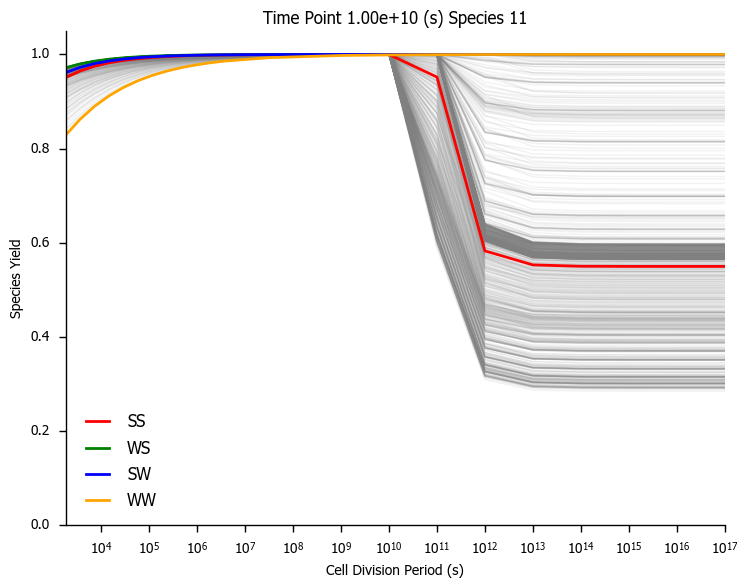

In [75]:
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(DS_Ranked.values()[0]),8):
    MainPlot.AddLine(
        XAxisPoints,
        [x[i] for x in DSS_Flat.values()],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    [x[9999] for x in DSS_Flat.values()],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[99] for x in DSS_Flat.values()],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[9900] for x in DSS_Flat.values()],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    [x[0] for x in DSS_Flat.values()],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [46]:
print "{:.2f} Days".format(TimePoints[TT]/60/24)
print "{:.2f} Years".format(TimePoints[TT]/60/24/365)

69.44 Days
0.19 Years


In [ ]:
%%time

OverallMainPlot = MP.MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=321,
#     axes_aspect="equal",
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

DSName = "STV2StaticT"
ChangeDS(DSName)
if "Static" in DSName:
    CDataSet = "in vitro-like"
else:
    CDataSet = "in vivo-like"
MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,0], Type="Time", RankOrValue="Value", VMarkLine=True, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[2,0], Type="Conc", RankOrValue="Value", VMarkLine=True, **Settings)

# MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,0], Type="Time", RankOrValue="Rank", Title = CDataSet, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,1], Type="Conc", RankOrValue="Rank", Title = CDataSet, **Settings)
# CP = AddContour(
#     OverallMainPlot,
#     gs1[0,0],
#     CDataSet,
#     Width = MP.inches2mm(3.5),
#     Aspect=1.0,
#     axes_aspect="equal",
#     ShiftRight = 0.025,
# #     ColorMarkers = False,
#     **Settings
#     )

# DSName = "STV2SynDeg28e-04T"
# ChangeDS(DSName)
# if "Static" in DSName:
#     CDataSet = "in vitro-like"
# else:
#     CDataSet = "in vivo-like"
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,1], Type="Time", RankOrValue="Value", VMarkLine=True, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[2,1], Type="Conc", RankOrValue="Value", VMarkLine=True, **Settings)
# # MainPlot = MakeRankPlot(OverallMainPlot, gs1[3,0], Type="Time", RankOrValue="Rank", Title = CDataSet, **Settings)
# # MainPlot = MakeRankPlot(OverallMainPlot, gs1[3,1], Type="Conc", RankOrValue="Rank", Title = CDataSet, **Settings)
# CP = AddContour(
#     OverallMainPlot,
#     gs1[0,1],
#     CDataSet,
#     Width = MP.inches2mm(3.5),
#     Aspect=1.0,
#     axes_aspect="equal",
#     ShiftRight = 0.025,
# #     ColorMarkers = False,
#     **Settings
#     )


MainPlot._MainFig.show()
MainPlot.SaveFig("GridPlots1.pdf",
                 bbox_inches = 'tight',
                 transparent=True
                )

Working Name: STV2StaticT
Shape: (100, 100)
Errors: 7
HasData: 1344000000
Time at TimePoint: 75646.3327555
Conc at A0Point: 4.32876128108e-06


/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [ ]:
%%time

OverallMainPlot = MP.MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=321,
#     axes_aspect="equal",
    Aspect=16.0/12.0,
    axes_aspect=16.0/12.0,
    **Settings
)
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)

# DSName = "STV2StaticT"
# ChangeDS(DSName)
# if "Static" in DSName:
#     CDataSet = "in vitro-like"
# else:
#     CDataSet = "in vivo-like"
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,0], Type="Time", RankOrValue="Value", VMarkLine=True, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[2,0], Type="Conc", RankOrValue="Value", VMarkLine=True, **Settings)
# # MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,0], Type="Time", RankOrValue="Rank", Title = CDataSet, **Settings)
# # MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,1], Type="Conc", RankOrValue="Rank", Title = CDataSet, **Settings)
# CP = AddContour(
#     OverallMainPlot,
#     gs1[0,0],
#     CDataSet,
#     Width = MP.inches2mm(3.5),
#     Aspect=1.0,
#     axes_aspect="equal",
#     ShiftRight = 0.025,
# #     ColorMarkers = False,
#     **Settings
#     )

DSName = "STV2SynDeg28e-04T"
ChangeDS(DSName)
if "Static" in DSName:
    CDataSet = "in vitro-like"
else:
    CDataSet = "in vivo-like"
MainPlot = MakeRankPlot(OverallMainPlot, gs1[1,1], Type="Time", RankOrValue="Value", VMarkLine=True, **Settings)
MainPlot = MakeRankPlot(OverallMainPlot, gs1[2,1], Type="Conc", RankOrValue="Value", VMarkLine=True, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[3,0], Type="Time", RankOrValue="Rank", Title = CDataSet, **Settings)
# MainPlot = MakeRankPlot(OverallMainPlot, gs1[3,1], Type="Conc", RankOrValue="Rank", Title = CDataSet, **Settings)
# CP = AddContour(
#     OverallMainPlot,
#     gs1[0,1],
#     CDataSet,
#     Width = MP.inches2mm(3.5),
#     Aspect=1.0,
#     axes_aspect="equal",
#     ShiftRight = 0.025,
# #     ColorMarkers = False,
#     **Settings
#     )


MainPlot._MainFig.show()
MainPlot.SaveFig("GridPlots2.pdf",
                 bbox_inches = 'tight',
                 transparent=True
                )